<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

#                       TEST SPRINT 8

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Estudiarás una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

###  Importar librerias y abrir archivo csv en nuestro libro de trabajo en Jupiterhub

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#Se leen los archivos cvs .
'''
df_cabs_company = pd.read_csv("moved_project_sql_result_01.csv")
df_average_trips = pd.read_csv("moved_project_sql_result_04.csv")
df_Loop_to_Hare = pd.read_csv("moved_project_sql_result_07.csv")
'''


df_cabs_company = pd.read_csv("/datasets/project_sql_result_01.csv")
df_average_trips = pd.read_csv("/datasets/project_sql_result_04.csv")
df_Loop_to_Hare = pd.read_csv("/datasets/project_sql_result_07.csv")

### Estudio de los datos en contenidos de los df.

In [4]:
# Datos del primer df.
df_cabs_company

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [5]:
#Visualizamos los tipos de datos del df. 
df_cabs_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


Podemos ver que los datos del primer df no necesitan ser modificados.

In [6]:
#Datos del segundo df.
df_average_trips

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [7]:
#Visualizamos los tipos de datos del df. 
df_average_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
#Rendondeamos los datos de average_trips ya que no es necesario tener tantos decimales.
df_average_trips[["average_trips"]] = df_average_trips["average_trips"].apply(np.ceil)
df_average_trips

,dropoff_location_name,average_trips
0,Loop,10728.0
1,River North,9524.0
2,Streeterville,6665.0
3,West Loop,5164.0
4,O'Hare,2547.0
...,...,...
89,Mount Greenwood,4.0
90,Hegewisch,4.0
91,Burnside,3.0
92,East Side,2.0


**Ya se tienen los datos con numeros enteros del promedio de viajes por cada taxi.**

In [9]:
#Datos del tercer df. 
df_Loop_to_Hare

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [10]:
#Visualizamos los tipos de datos del df. 
df_Loop_to_Hare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de leer los datos y hacer una revisión inicial
</div>

### Cambio de tipos de datos por los adecuados

In [11]:
#Cambiaremos la columna con los datos de tiempo a formato de tiempo y no de float
df_Loop_to_Hare["duration_min"] = df_Loop_to_Hare["duration_seconds"]/60
df_Loop_to_Hare[["duration_min"]] = df_Loop_to_Hare["duration_min"].apply(np.ceil)
df_Loop_to_Hare

,start_ts,weather_conditions,duration_seconds,duration_min
0,2017-11-25 16:00:00,Good,2410.0,41.0
1,2017-11-25 14:00:00,Good,1920.0,32.0
2,2017-11-25 12:00:00,Good,1543.0,26.0
3,2017-11-04 10:00:00,Good,2512.0,42.0
4,2017-11-11 07:00:00,Good,1440.0,24.0
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,0.0
1064,2017-11-11 10:00:00,Good,1318.0,22.0
1065,2017-11-11 13:00:00,Good,2100.0,35.0
1066,2017-11-11 08:00:00,Good,1380.0,23.0


In [12]:
#Eliminamos la columna de segundo. 
df_Loop_to_Hare = df_Loop_to_Hare.drop(df_Loop_to_Hare.columns[2], axis= 1)
df_Loop_to_Hare

,start_ts,weather_conditions,duration_min
0,2017-11-25 16:00:00,Good,41.0
1,2017-11-25 14:00:00,Good,32.0
2,2017-11-25 12:00:00,Good,26.0
3,2017-11-04 10:00:00,Good,42.0
4,2017-11-11 07:00:00,Good,24.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,22.0
1065,2017-11-11 13:00:00,Good,35.0
1066,2017-11-11 08:00:00,Good,23.0


In [13]:
#convertimos a tipo de dato de tiempo la columna start_ts.
df_Loop_to_Hare["start_ts"] = pd.to_datetime(df_Loop_to_Hare["start_ts"], errors="coerce")
df_Loop_to_Hare

,start_ts,weather_conditions,duration_min
0,2017-11-25 16:00:00,Good,41.0
1,2017-11-25 14:00:00,Good,32.0
2,2017-11-25 12:00:00,Good,26.0
3,2017-11-04 10:00:00,Good,42.0
4,2017-11-11 07:00:00,Good,24.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,22.0
1065,2017-11-11 13:00:00,Good,35.0
1066,2017-11-11 08:00:00,Good,23.0


In [14]:
df_Loop_to_Hare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_min        1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


**Procederemos a la busqueda de valores nulos.**

In [15]:
df_cabs_company.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [16]:
df_average_trips.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [17]:
df_Loop_to_Hare.isna().sum()

start_ts              0
weather_conditions    0
duration_min          0
dtype: int64

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de hacer los cambios necesarios en los datos
</div>

**Podemos observar que en ningun dataframe tenemos valores ausentes, por lo que continuamos con la visualizacion por medio de graficas.**

In [17]:
df_concat_dfs = pd. concat([df_cabs_company, df_average_trips],axis=1, join="outer")
df_concat_dfs

,company_name,trips_amount,dropoff_location_name,average_trips
0,Flash Cab,19558.0,Loop,10728.0
1,Taxi Affiliation Services,11422.0,River North,9524.0
2,Medallion Leasin,10367.0,Streeterville,6665.0
3,Yellow Cab,9888.0,West Loop,5164.0
4,Taxi Affiliation Service Yellow,9299.0,O'Hare,2547.0
...,...,...,...,...
89,NaN,NaN,Mount Greenwood,4.0
90,NaN,NaN,Hegewisch,4.0
91,NaN,NaN,Burnside,3.0
92,NaN,NaN,East Side,2.0


<div class="alert alert-block alert-warning"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Cuidado!<br/>

No considero que esto aporte al avance del proyecto, los datos de ambos conjuntos de datos son muy distintos por lo que no tiene mucho sentido hacer una sola tabla 
</div>

### Principales barrios donde bajan los usuarios

In [20]:
#los 10 locaciones de bajada de usuario mas populares
df_average_trips_10_mostfamous = df_average_trips.groupby(by= "dropoff_location_name", as_index= False)["average_trips"].sum().sort_values(by= "average_trips", ascending= False)
df_average_trips_10_mostfamous = df_average_trips_10_mostfamous.head(10)
df_average_trips_10_mostfamous

,dropoff_location_name,average_trips
50,Loop,10728.0
68,River North,9524.0
78,Streeterville,6665.0
87,West Loop,5164.0
63,O'Hare,2547.0
44,Lake View,2421.0
35,Grant Park,2069.0
56,Museum Campus,1510.0
32,Gold Coast,1365.0
74,Sheffield & DePaul,1260.0


### Creacion de graficos

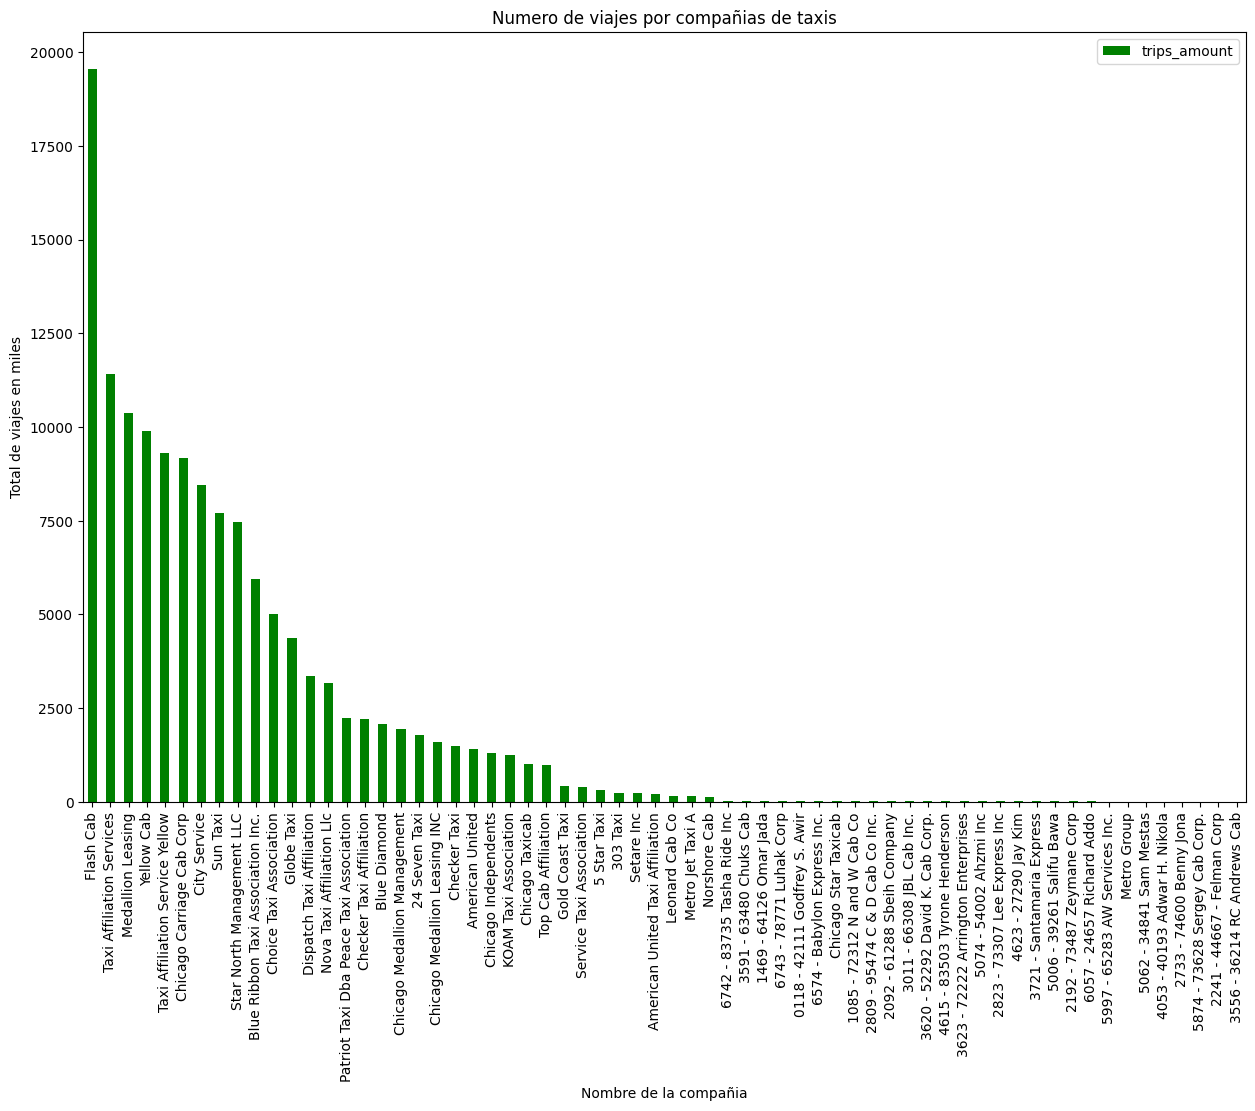

In [21]:
# Grafica de barras donde se ven el total de viajes por compañia de taxis
df_cabs_company.plot(title = "Numero de viajes por compañias de taxis",
                        kind = "bar",
                        x = "company_name",
                        y = "trips_amount",
                        xlabel = "Nombre de la compañia",
                        ylabel = "Total de viajes en miles",
                        color = "g",
                        xlim=[0,20],
                        figsize=[15,10])                              
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de mostrar el resultado, se puede observar claramente cual compañía es la que tiene más viajes agendados, aunque recomendaría solo mostrar el top 10-15 de compañías, de esta manera se observaran mejor los resultados en la grafica
</div>

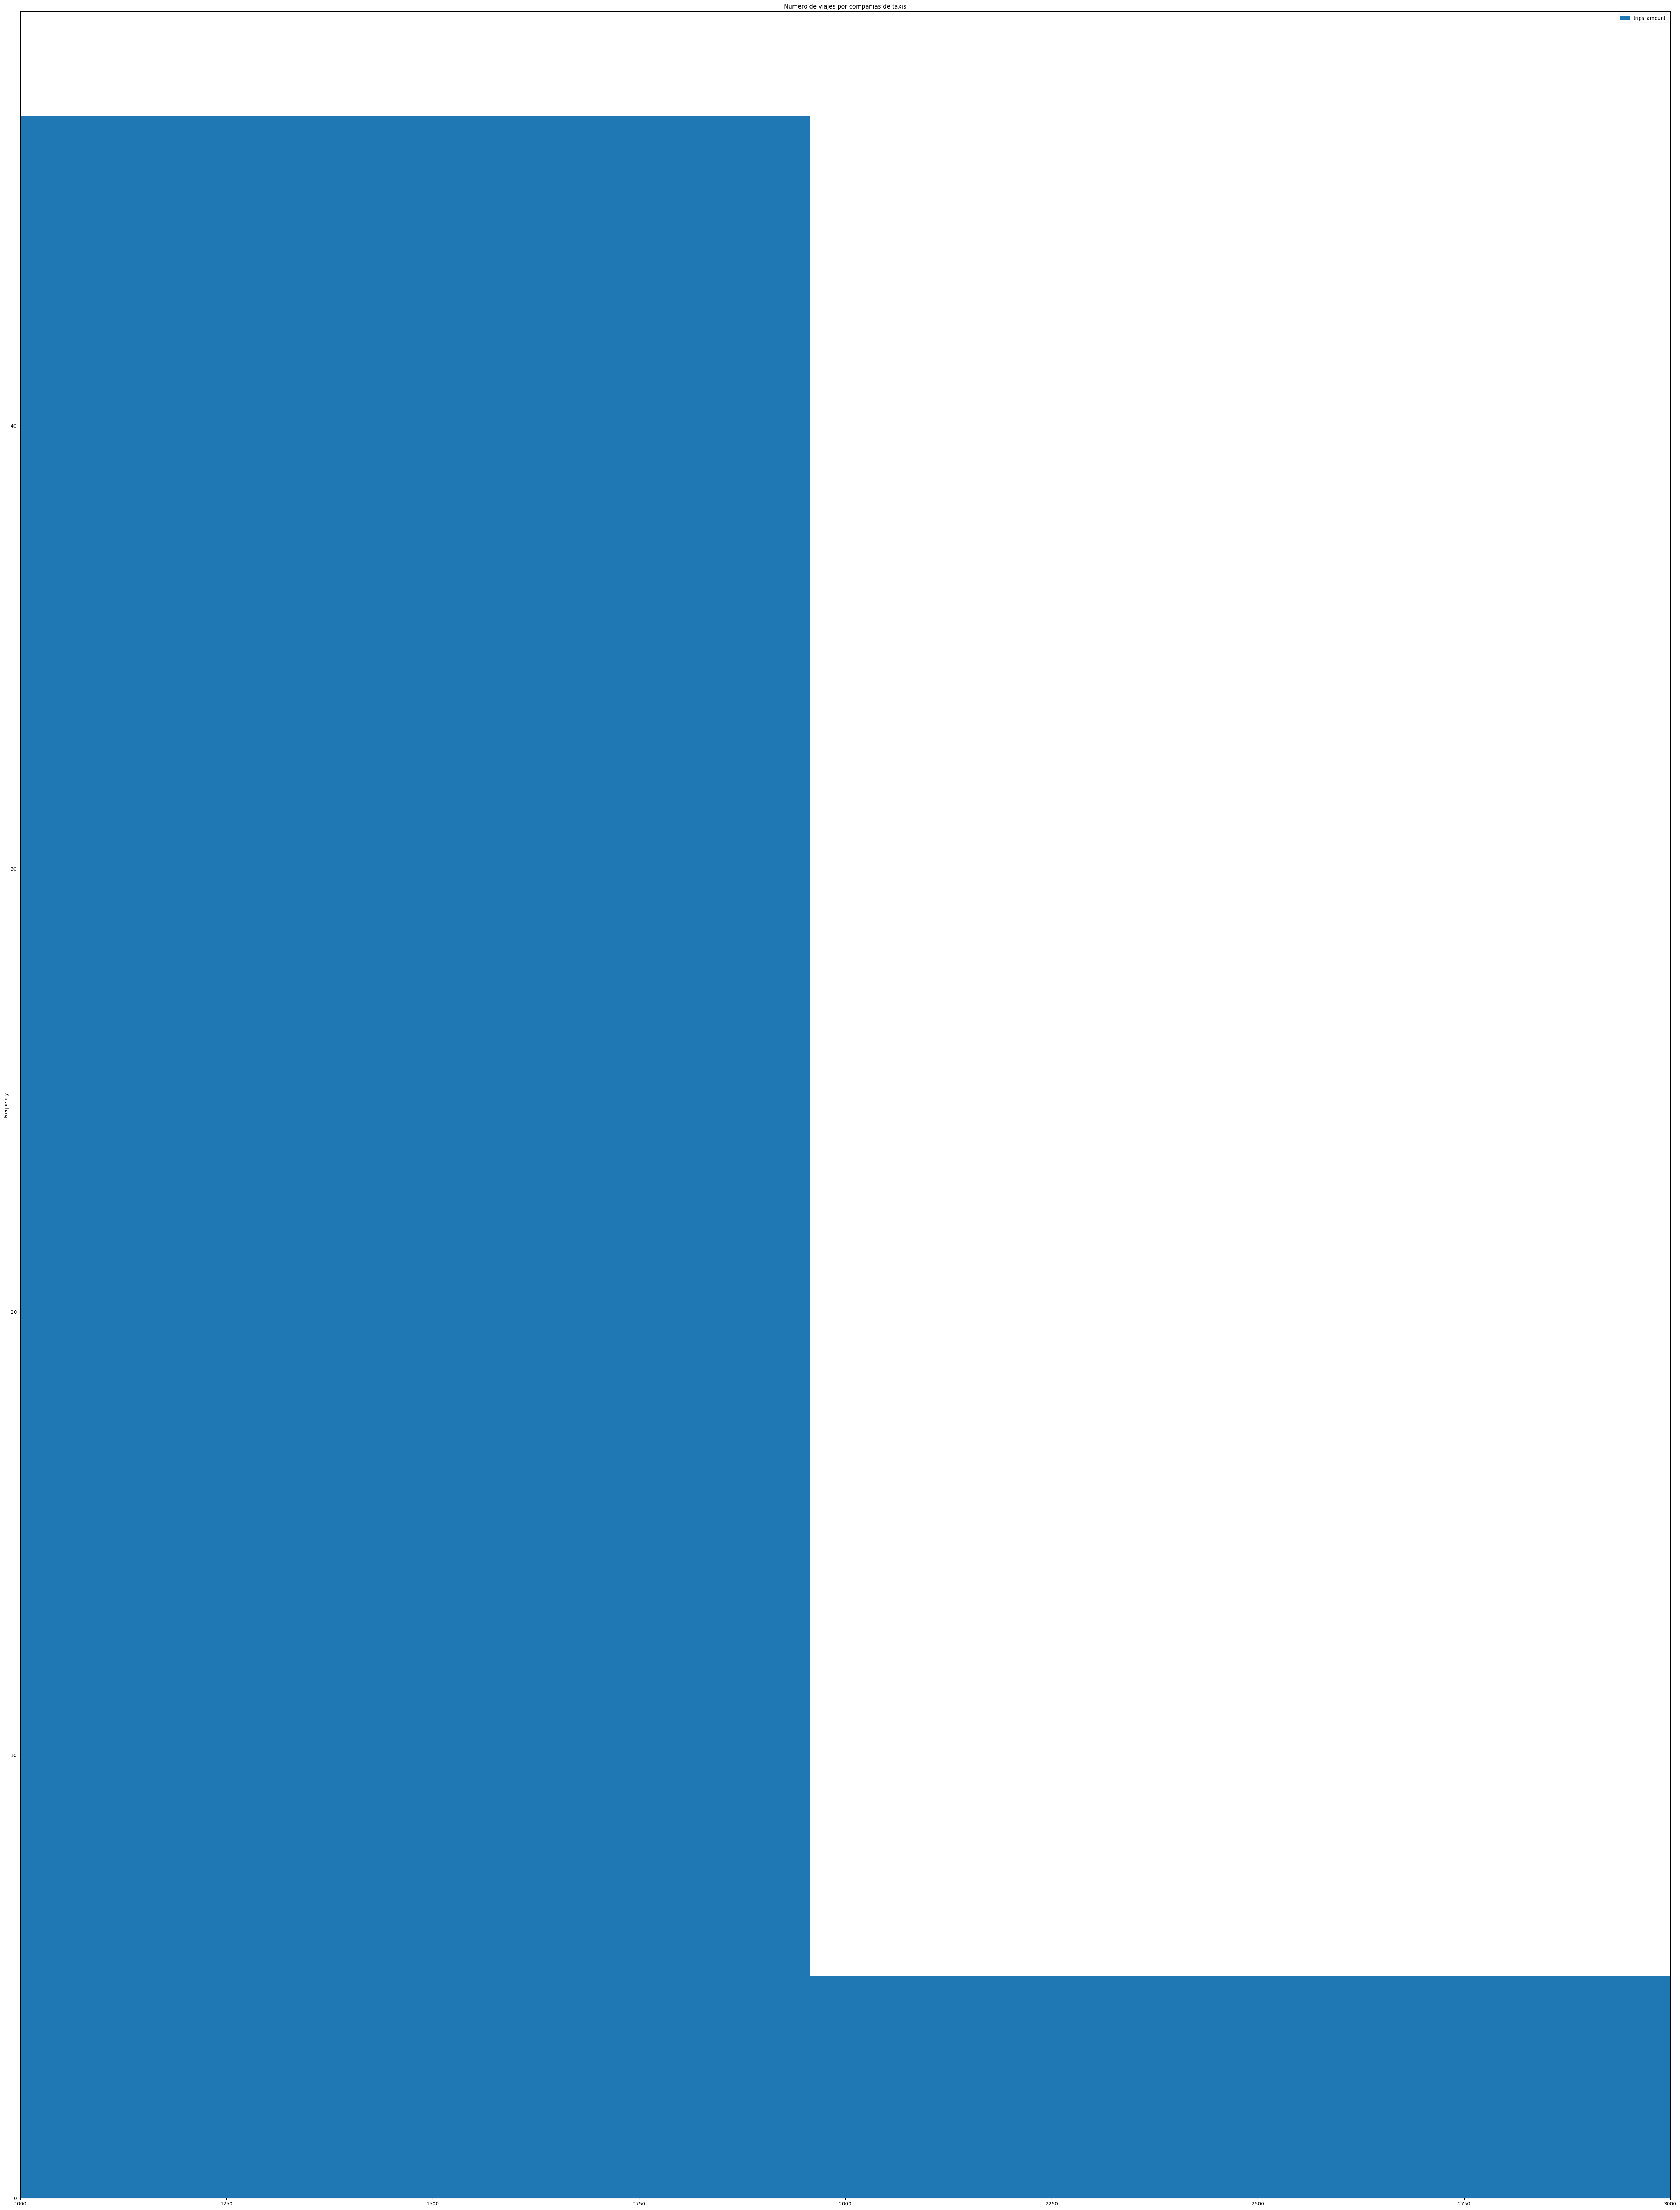

In [22]:
# Grafica de histograma donde se ven el total de viajes por compañia de taxis
df_cabs_company.plot(title = "Numero de viajes por compañias de taxis",
                        kind = "hist",
                        x = "company_name",
                        y = "trips_amount",
                        xlabel = "Nombre de la compañia",
                        ylabel = "Total de viajes en miles",
                        xlim=[1000,3000],
                        figsize=[60,80])                              
plt.show()

<div class="alert alert-block alert-warning"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

La grafica anterior a esta ya era suficiente para mostrar la cantidad de viajes, este histograma no aporta mucho
</div>

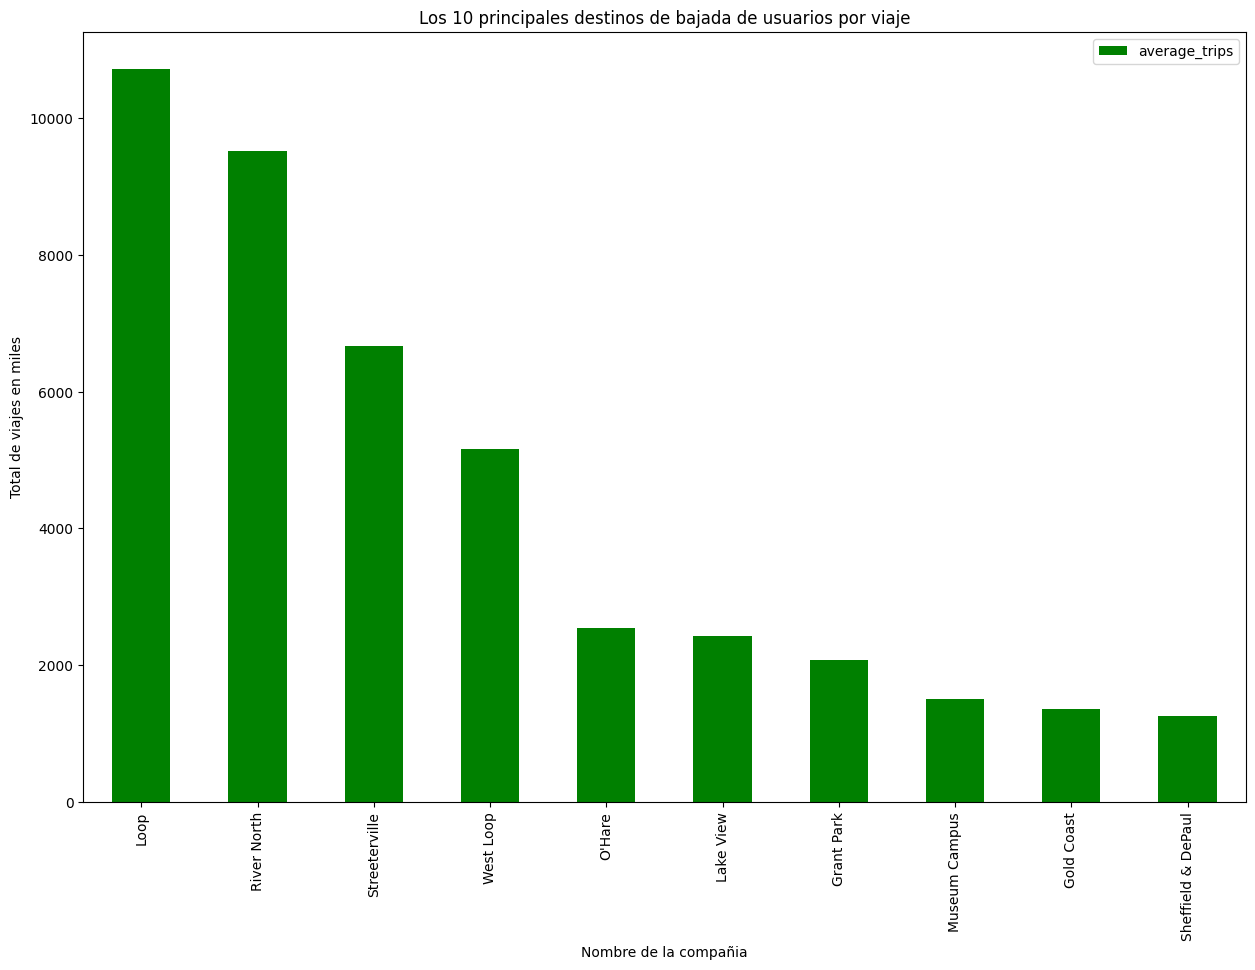

In [23]:
# Grafica de barras donde se ven los 10 principales barrios por bajada de usuarios.
df_average_trips_10_mostfamous.plot(title = "Los 10 principales destinos de bajada de usuarios por viaje",
                        kind = "bar",
                        x = "dropoff_location_name",
                        y = "average_trips",
                        xlabel = "Nombre de la compañia",
                        ylabel = "Total de viajes en miles",
                        color = "g",
                        xlim=[0,20],
                        figsize=[15,10])                              
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de crear una grafica que nos muestra los lugares más frecuentados
</div>

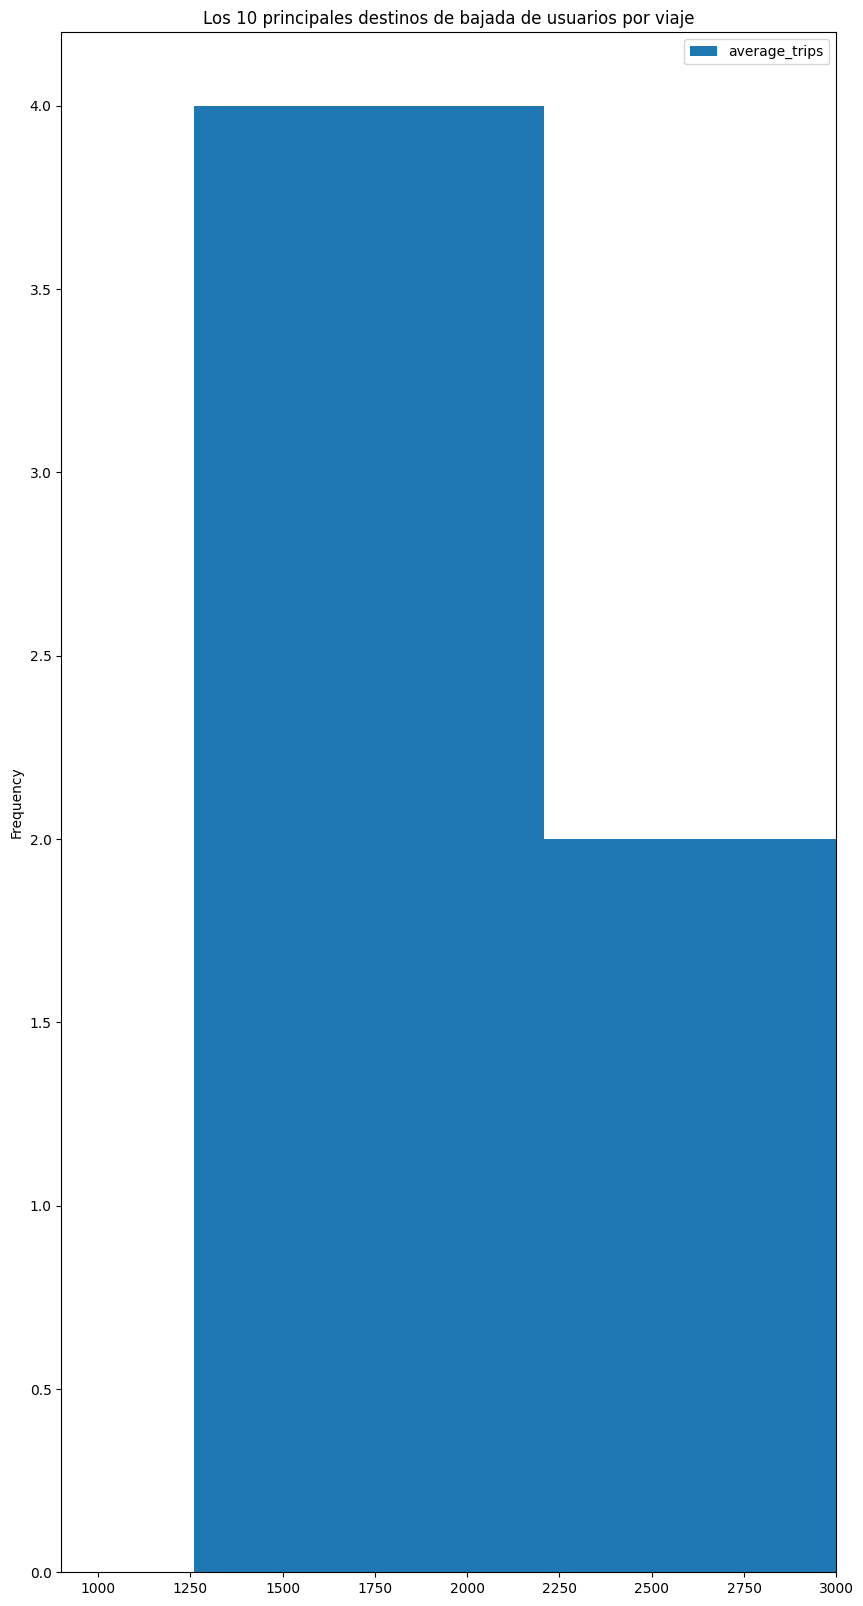

In [22]:
# Grafica de histograma donde se ven los 10 principales barrios por bajada de usuarios.
df_average_trips_10_mostfamous.plot(title = "Los 10 principales destinos de bajada de usuarios por viaje",
                        kind = "hist",
                        x = "dropoff_location_name",
                        y = "average_trips",
                        xlabel = "Nombre de la compañia",
                        ylabel = "Total de viajes en miles",
                        xlim=[900,3000],
                        figsize=[10,20])                              
plt.show()

<div class="alert alert-block alert-warning"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Mismo comentario que en el histograma pasado
</div>

**Conclucion:**

Podemos observar que la compañia Flash Cab es la empresa con mas viajes, asi mismo el destino con mas bajadas por usuario es en el barrio de Loop, sera por la cercania con el aeorupuerto?.

# PRUEBA DE HIPOTESIS

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:

cómo planteaste las hipótesis nula y alternativa
qué criterio usaste para probar las hipótesis y por qué

In [24]:
#Datos del df. ya corregidos anteriormente.
df_Loop_to_Hare

,start_ts,weather_conditions,duration_min
0,2017-11-25 16:00:00,Good,41.0
1,2017-11-25 14:00:00,Good,32.0
2,2017-11-25 12:00:00,Good,26.0
3,2017-11-04 10:00:00,Good,42.0
4,2017-11-11 07:00:00,Good,24.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,22.0
1065,2017-11-11 13:00:00,Good,35.0
1066,2017-11-11 08:00:00,Good,23.0


In [25]:
#Saber si solo los dias sabados estan en el df.
df_Loop_to_Hare.saturday = df_Loop_to_Hare["start_ts"].dt.day_name()
df_Loop_to_Hare.saturday

/tmp/ipykernel_214/3355966952.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_Loop_to_Hare.saturday = df_Loop_to_Hare["start_ts"].dt.day_name()


0       Saturday
1       Saturday
2       Saturday
3       Saturday
4       Saturday
          ...   
1063    Saturday
1064    Saturday
1065    Saturday
1066    Saturday
1067    Saturday
Name: start_ts, Length: 1068, dtype: object

In [26]:
#Duracion de los viajes.
df_Loop_to_Hare_trips = df_Loop_to_Hare.drop(columns= ["start_ts","weather_conditions"], axis= 1)
df_Loop_to_Hare_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   duration_min  1068 non-null   float64
dtypes: float64(1)
memory usage: 8.5 KB


In [27]:
#buscar solo los climas malos (bad)
df_Loop_to_Hare_bad_weather = df_Loop_to_Hare.query('weather_conditions == "Bad"')
df_Loop_to_Hare_bad_weather

,start_ts,weather_conditions,duration_min
6,2017-11-04 16:00:00,Bad,50.0
30,2017-11-18 12:00:00,Bad,33.0
34,2017-11-04 17:00:00,Bad,41.0
51,2017-11-04 16:00:00,Bad,46.0
52,2017-11-18 12:00:00,Bad,41.0
...,...,...,...
1031,2017-11-18 12:00:00,Bad,43.0
1032,2017-11-18 10:00:00,Bad,32.0
1053,2017-11-18 12:00:00,Bad,40.0
1061,2017-11-18 16:00:00,Bad,37.0


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Bien hecho!<b/>

La manera de separar la información de ambos días es correcta
</div>

In [28]:
#Duracion de los viajes con mal clima y los sabados.
df_Loop_to_Hare_bad_weather_trips = df_Loop_to_Hare_bad_weather.drop(columns= ["start_ts","weather_conditions"], axis= 1)
df_Loop_to_Hare_bad_weather_trips

,duration_min
6,50.0
30,33.0
34,41.0
51,46.0
52,41.0
...,...
1031,43.0
1032,32.0
1053,40.0
1061,37.0


In [29]:
df_Loop_to_Hare_bad_weather_trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   duration_min  180 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


In [30]:
from scipy import stats as st
import numpy as np
import pandas as pd

alpha = 0.05  # establece la significación estadística crítica

results= st.ttest_ind(df_Loop_to_Hare_trips, df_Loop_to_Hare_bad_weather_trips, equal_var =False)

print('valor p:', results.pvalue) # prueba unilateral: el valor p se divide en dos

# prueba unilateral a la izquierda:
# rechaza la hipótesis solo si la media muestral es significativamente menor que el valor propuesto
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: [6.48471632e-09]
Rechazamos la hipótesis nula


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Bien hecho!<br/>

Es correcto rechazar la hipotesis nula, debido a que sí hay notables cambios entre un día de buenas condiciones y uno con malas condiciones
</div>

Conclusion:
Se rechaza la hipotesis nula debido a que es mayor la diferencia entre los viajes con clima malo. 

# Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, los procedimientos realizados son correctos, este es un ejercicio que nos ayuda a entender y comprobar las hipotesis con procesos estadisticos.<br/>    
<br/>    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>
